<a href="https://colab.research.google.com/github/tanmoyee04/The-Uplift-project/blob/main/CNN_using_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# CIFAR-10 Dataset

(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


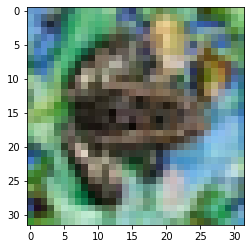

In [5]:
plt.imshow(x_train[200])

In [6]:
x_train[200]

array([[[105, 155, 204],
        [ 99, 150, 206],
        [111, 149, 195],
        ...,
        [113, 160,  87],
        [150, 197, 134],
        [164, 216, 142]],

       [[113, 169, 210],
        [ 85, 132, 183],
        [ 70, 101, 131],
        ...,
        [ 72, 136,  58],
        [107, 176, 102],
        [140, 207, 136]],

       [[106, 165, 209],
        [ 90, 132, 189],
        [ 47,  71, 108],
        ...,
        [ 75, 129,  89],
        [117, 185, 111],
        [120, 193, 111]],

       ...,

       [[ 55,  74, 127],
        [ 32,  13,  34],
        [ 36,  30,  21],
        ...,
        [ 12, 103,  76],
        [ 44,  92, 116],
        [103, 146, 186]],

       [[ 49, 103,  75],
        [ 50,  57,  21],
        [ 57,  76,  25],
        ...,
        [ 42, 141,  87],
        [ 86, 150, 154],
        [117, 172, 202]],

       [[ 60, 146,  50],
        [ 93, 137,  45],
        [ 95, 156,  63],
        ...,
        [ 97, 180, 151],
        [ 92, 165, 173],
        [ 84, 160, 196]]

### Data Preprocessing

In [7]:
# Normalisation 

x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train[200]

array([[[0.41176471, 0.60784314, 0.8       ],
        [0.38823529, 0.58823529, 0.80784314],
        [0.43529412, 0.58431373, 0.76470588],
        ...,
        [0.44313725, 0.62745098, 0.34117647],
        [0.58823529, 0.77254902, 0.5254902 ],
        [0.64313725, 0.84705882, 0.55686275]],

       [[0.44313725, 0.6627451 , 0.82352941],
        [0.33333333, 0.51764706, 0.71764706],
        [0.2745098 , 0.39607843, 0.51372549],
        ...,
        [0.28235294, 0.53333333, 0.22745098],
        [0.41960784, 0.69019608, 0.4       ],
        [0.54901961, 0.81176471, 0.53333333]],

       [[0.41568627, 0.64705882, 0.81960784],
        [0.35294118, 0.51764706, 0.74117647],
        [0.18431373, 0.27843137, 0.42352941],
        ...,
        [0.29411765, 0.50588235, 0.34901961],
        [0.45882353, 0.7254902 , 0.43529412],
        [0.47058824, 0.75686275, 0.43529412]],

       ...,

       [[0.21568627, 0.29019608, 0.49803922],
        [0.1254902 , 0.05098039, 0.13333333],
        [0.14117647, 0

In [9]:
y_train[200]

array([6], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [11]:
y_train[200] #onehot encoding

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Building the Model

In [12]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Conv2D(32, (3,3), activation='relu'),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               295168    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='accuracy',mode='max', patience=3)

In [16]:
model.fit(x_train,y_train,epochs=15,callbacks=[es],verbose=2)

Epoch 1/15
1563/1563 - 4s - loss: 0.5631 - accuracy: 0.8029
Epoch 2/15
1563/1563 - 4s - loss: 0.4876 - accuracy: 0.8288
Epoch 3/15
1563/1563 - 4s - loss: 0.4129 - accuracy: 0.8543
Epoch 4/15
1563/1563 - 4s - loss: 0.3486 - accuracy: 0.8774
Epoch 5/15
1563/1563 - 4s - loss: 0.2961 - accuracy: 0.8956
Epoch 6/15
1563/1563 - 4s - loss: 0.2472 - accuracy: 0.9132
Epoch 7/15
1563/1563 - 4s - loss: 0.2093 - accuracy: 0.9269
Epoch 8/15
1563/1563 - 4s - loss: 0.1738 - accuracy: 0.9387
Epoch 9/15
1563/1563 - 4s - loss: 0.1615 - accuracy: 0.9437
Epoch 10/15
1563/1563 - 4s - loss: 0.1327 - accuracy: 0.9532
Epoch 11/15
1563/1563 - 4s - loss: 0.1291 - accuracy: 0.9544
Epoch 12/15
1563/1563 - 4s - loss: 0.1090 - accuracy: 0.9623
Epoch 13/15
1563/1563 - 4s - loss: 0.1080 - accuracy: 0.9626
Epoch 14/15
1563/1563 - 4s - loss: 0.1008 - accuracy: 0.9649
Epoch 15/15
1563/1563 - 4s - loss: 0.0943 - accuracy: 0.9673


In [17]:
acc_loss = pd.DataFrame(model.history.history)
acc_loss

,loss,accuracy
0,0.563060,0.80294
1,0.487606,0.82878
2,0.412909,0.85430
3,0.348644,0.87738
4,0.296138,0.89564
5,0.247198,0.91324
6,0.209269,0.92694
7,0.173775,0.93872
8,0.161487,0.94374
9,0.132660,0.95324


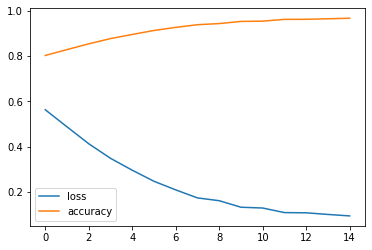

In [18]:
acc_loss.plot()

### Testing

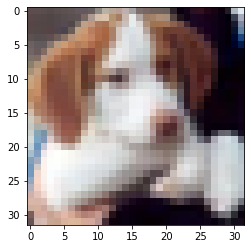

In [19]:
plt.imshow(x_test[16])

In [21]:
pred=model.predict(x_test[16].reshape(1,32,32,3))

In [22]:
np.argmax(pred)

5

In [23]:
model.predict_classes(x_test[16].reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])

In [24]:
y_test[16]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Saving and Plotting

In [25]:
model.save('model.h5')

In [26]:
model1 = keras.models.load_model('model.h5')
model.predict_classes(x_test[16].reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])

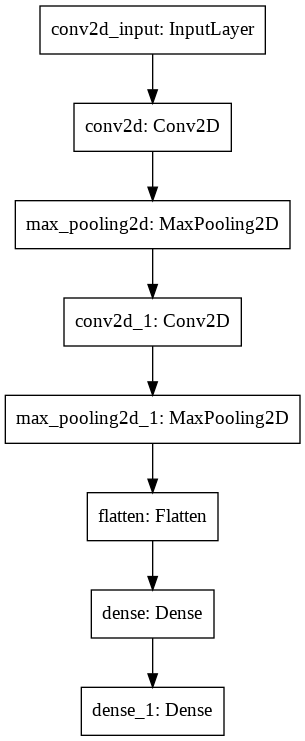

In [27]:
keras.utils.plot_model(model,to_file='model.png')